## X vs Y Scatter Plot from CSV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import Bisection_Library as BisLib

def plot_xy(directory, csv_name, x_branch, y_branch, title, x_label, y_label):

    csv_file = os.path.join(directory, csv_name)
    df = pd.read_csv(csv_file)

    x = df[x_branch]
    y = df[y_branch]

    plt.figure(figsize = (10, 6))
    BisLib.PlotsFormatting()
    plt.tight_layout(rect = [0, 0.01, 1, 1])

    plt.plot(x, y, marker = 'o')
    plt.grid(True, alpha = 0.5)
    
    plt.xlabel(x_label, fontweight = "bold", labelpad = 21)
    plt.ylabel(y_label, fontweight = "bold", labelpad = 22)
    plt.title (title  , fontweight = "bold", pad = 25)
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_alpha(0.3)
    ax.spines['right'].set_alpha(0.3)
    ax.spines['bottom'].set_alpha(0.7)
    ax.spines['left'].set_alpha(0.7)

    plt.savefig(title + '.png', dpi = 10)
    plt.show()

    print('Plot saved as', title + '.png')

In [ ]:
directory = 'build/root/'
csv_name = 'Aluminio2.csv'

x_branch = "Energy"
y_branch = 'Optimal_Thickness'

title = "title2"
x_label = r"x axis ($keV$)"
y_label = r"y axis"

plot_xy(directory, csv_name, x_branch, y_branch, title, x_label, y_label)

## Plot Histogram from CSV

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import Bisection_Library as BisLib

def histogram(directory, csv_name, data, set_bins, positive, title, x_label, y_label):

    csv_file = os.path.join(directory, csv_name)
    df = pd.read_csv(csv_file)

    points = df[data]
    if positive == True:
        points = df[df[data] > 0]

    plt.figure(figsize=(10, 7))
    BisLib.PlotsFormatting()
    #plt.tight_layout(rect=[0, 1, 1, 1]) 

    plt.hist(points, bins = set_bins, alpha = 1)

    plt.axvline(x=45, color='red', linestyle='--', linewidth=2, label='x=45')
    plt.axvline(x=-45, color='blue', linestyle='--', linewidth=2, label='x=-45')

    plt.title(title, pad = 15)
    plt.xlabel(x_label, labelpad = 15)
    plt.ylabel(y_label, labelpad = 15)
    plt.grid(True)

    plt.savefig(title + '.png', dpi = 300)
    plt.show()

    print('Plot saved as', title + '.png')

In [ ]:
directory = 'build/root/'
csv_name = 'rad_3_80_5.csv'

data = "PositionX"
set_bins = 1000
positive = False

title = 'title'
x_label = 'x axis (keV)'
y_label = 'Frequency'

histogram(directory, csv_name, data, set_bins, positive, title, x_label, y_label)

## Plot 2x2 multi Heatmaps from CSV

In [ ]:
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots

def heatmap(n, directory, csv_1, csv_2, csv_3, csv_4, x_branch, y_branch, title, x_label, y_label, width, height):

    df_1 = pd.read_csv(os.path.join(directory, csv_1))
    df_2 = pd.read_csv(os.path.join(directory, csv_2))

    x_data = [df_1[x_branch], df_2[x_branch]]
    y_data = [df_1[y_branch], df_2[y_branch]]

    if n > 2:
        df_3 = pd.read_csv(os.path.join(directory, csv_3))
        x_data.append(df_3[x_branch])
        y_data.append(df_3[y_branch])
        
        if n > 3:
            df_4 = pd.read_csv(os.path.join(directory, csv_4))
            x_data.append(df_4[x_branch])
            y_data.append(df_4[y_branch])

    fig = make_subplots(rows = 2, cols = 2, horizontal_spacing = 0.13, vertical_spacing = 0.13,
                        subplot_titles = ['Title for Subplot 1', 'Title for Subplot 2', 'Title for Subplot 3', 'Title for Subplot 4'])

    for i in range(2):
        for j in range(2):
            k = i * 2 + j 
            if k < n:  # Check to avoid out-of-bound errors
                fig.add_trace(go.Histogram2d(x = x_data[k], y = y_data[k], xbins = dict(size = 5), ybins = dict(size = 5)), row = i+1, col = j+1,)

    font_family = 'Merriweather'
    font_small  = 12
    font_medium = 16
    font_large  = 20
    
    fig.update_layout(title = dict(text = title, font = dict(family = font_family, size = font_large, color = "Black"), x = 0.5, yanchor = 'middle', xanchor = 'center'),
                      width = width, height = height, margin = dict(l = 105, r = 105, t = 100, b = 100), yaxis_title_standoff = 15)
    
    for i in range(2):
        for j in range(2):
            fig.update_xaxes(tickfont = dict(family = font_family, size = font_small, color = "Black"), row = i+1, col = j+1, title_standoff = 30) # range = [-200, 200]
            fig.update_yaxes(tickfont = dict(family = font_family, size = font_small, color = "Black"), row = i+1, col = j+1, title_standoff = 15)
    
    fig.update_xaxes(title_text = "xaxis 1 title", title_font = dict(family = font_family, size = font_medium, color = "Black"), row = 2, col = 2)
    fig.update_xaxes(title_text = "xaxis 1 title", title_font = dict(family = font_family, size = font_medium, color = "Black"), range=[-200, 200], row = 2, col = 1)
    fig.update_yaxes(title_text = "yaxis 1 title", title_font = dict(family = font_family, size = font_medium, color = "Black"), row = 1, col = 1)
    fig.update_yaxes(title_text = "yaxis 2 title", title_font = dict(family = font_family, size = font_medium, color = "Black"), range=[-200, 200], row = 2, col = 1)
    
    pio.write_image(fig, "test.jpg", width = width, height = height, scale = 5)
    fig.show()

In [ ]:
n = 4

directory = 'BUILD/ROOT/'

csv_1 = 'root0.csv'
csv_2 = 'root1.csv'
csv_3 = 'root2.csv'
csv_4 = 'root4.csv'

x_branch = "X_axis"
y_branch = 'Y_axis'

title = "Heatmap"
x_label = r"$ \large{ \text{X Axis ejemplo} \ (m^2)} $"
y_label = r"$ \large{ \text{Y Axis ejemplo} \ (cm^2)} $"

width  = 800
height = 800

heatmap(n, directory, csv_1, csv_2, csv_3, csv_4, x_branch, y_branch, title, x_label, y_label, width, height)

## Plot Two Vectors

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import Bisection_Library as BisLib

def plot_xy(x, y1, y2, y3, title, x_label, y_label):

    plt.figure(figsize = (10, 6))
    BisLib.PlotsFormatting()
    plt.tight_layout(rect = [0, 0.01, 1, 1])

    x1 = np.arange(5, 120, 0.5)
    y4 = 1.5 * (15 + x1) / x1 * 2

    # plt.plot(x, y1, marker = 'x', label = 'Expected size', color = 'red', markersize = 8)
    plt.plot(x, y2, marker = 'o', label = 'Approximate Size without border', color = 'blue', alpha = 0.5, markersize = 8)
    plt.plot(x, y3, marker = 'o', label = 'Full size', color = 'green', markersize = 8)
    plt.plot(x1, y4, marker = 'x', label = 'Expected size', color = 'red', markersize = 5)

    plt.grid(True, alpha = 0.5)
    
    plt.xlabel(x_label, fontweight = "bold", labelpad = 21)
    plt.ylabel(y_label, fontweight = "bold", labelpad = 21)
    plt.title(title, fontweight = "bold", pad = 25)
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_alpha(0.3)
    ax.spines['right'].set_alpha(0.3)
    ax.spines['bottom'].set_alpha(0.7)
    ax.spines['left'].set_alpha(0.7)

    plt.legend()

    plt.savefig(save_as, dpi = 300)
    plt.show()

In [ ]:
x  = [5, 10, 30, 40, 50, 120]
y1 = [12, 7.5, 4.5, 4.125, 3.9, 3.375]
y2 = [12.82, 7.4, 4.4, 3.9, 3.7, 3.25]
y3 = [24.6, 10.23, 5.02, 4.42,4.24, 3.65 ]

title = "Comparison of expected size vs. experimental size"
x_label = "Distance Source–Sample [cm]"
y_label = "Image Size [mm]"

save_as = "sizes.png"

plot_xy(x, y1, y2, y3, title, x_label, y_label)

## Plot 3 in 1 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.interpolate import interp1d
import numpy as np
import Bisection_Library as BisLib

def Plot_3in1(directory, csv_1, csv_2, x_branch_1, y_branch_1, title, x_label, y_label, save_as):

    path_1 = os.path.join(directory, csv_1)
    path_2 = os.path.join(directory, csv_2)
    
    df_1 = pd.read_csv(path_1)
    df_2 = pd.read_csv(path_2)
    df_2.columns = df_2.columns.str.strip()

    x1 = df_1[x_branch_1]

    y11 = df_1['Muscle']
    y12 = df_1['Fat']
    y13 = df_1['Skin']

    x2 = df_2['Energy']

    y21 = df_2['Muscle']
    y22 = df_2['Adipose']
    y23 = df_2['Skin']

    interp_muscle   = interp1d(x2, y21, kind='cubic', fill_value="extrapolate")
    interp_adipose  = interp1d(x2, y22, kind='cubic', fill_value="extrapolate")
    interp_skin     = interp1d(x2, y23, kind='cubic', fill_value="extrapolate")

    y21_interp = interp_muscle(x1)
    y22_interp = interp_adipose(x1)
    y23_interp = interp_skin(x1)

    error_muscle    = np.abs((y11 - y21_interp) / y21_interp) * 100
    error_adipose   = np.abs((y12 - y22_interp) / y22_interp) * 100
    error_skin      = np.abs((y13 - y23_interp) / y23_interp) * 100

    error_muscle = error_muscle.mean()
    error_adipose = error_adipose.mean()
    error_skin = error_skin.mean()
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12), sharex=True)
    BisLib.PlotsFormatting()

    ax1.grid(True, which='both', linestyle='--', linewidth=0.7)
    ax1.plot(x2, y21, marker='o', markersize=3, label='Experimental data ($\\rho = 1.05$)', color='red', alpha=0.6)
    ax1.plot(x1, y11, marker='o', markersize=1, label='Simulated ($\\rho = 1.05$)', color='blue', alpha=0.8)
    ax1.set_ylabel('', fontsize=16)
    ax1.legend(loc='upper right')
    fig.text(0.68, 0.87, f'Global Percentage Error: {error_muscle:.2f}%', fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))
    # ax1.set_title('Skeletal Muscle', fontsize=SIZE_LARGE)
    ax1.set_title('Skeletal Muscle')

    ax2.grid(True, which='both', linestyle='--', linewidth=0.7)
    ax2.plot(x1, y12, marker='o', markersize=1, label='Simulated ($\\rho = 0.95$)', color='blue', alpha=0.8)
    ax2.plot(x2, y22, marker='x', markersize=3, label='Experimental data ($\\rho = 0.95$)', color='green', alpha=0.6)
    # ax2.plot(x1, y22_interp, marker='o', markersize=3, label='Experimental data ($\\rho = 0.95$)', color='red', alpha=0.6)
    ax2.set_ylabel(y_label, fontsize=16, labelpad = 18)
    ax2.legend(loc = 'upper right')
    fig.text(0.68, 0.565, f'Global Percentage Error: {error_adipose:.2f}%', fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))
    # ax2.set_title('Adipose Tissue', fontsize=SIZE_LARGE)
    ax2.set_title('Adipose Tissue')

    ax3.grid(True, which='both', linestyle='--', linewidth=0.7)
    ax3.plot(x1, y13, marker='o', markersize=1, label='Simulated ($\\rho = 1.09$)', color='blue', alpha=0.8)
    ax3.plot(x2, y23, marker='x', markersize=3, label='Experimental data ($\\rho = 1.09$)', color='black', alpha=0.6)
    ax3.set_ylabel('', fontsize=16)
    # ax3.set_title('Skin', fontsize=SIZE_LARGE)
    ax3.set_title('Skin')
    ax3.set_xlabel(x_label, fontsize=16, labelpad = 18)
    ax3.legend(loc='upper right')
    fig.text(0.68, 0.255, f'Global Percentage Error: {error_skin:.2f}%', fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.savefig(save_as + '.png', dpi = 600)
    plt.show()

In [ ]:
directory = '/Users/miguelcomett/geant4-v11.2.2/Estancia_G4/RESULTS/RADIOGRAFÍAS/MAC_data/'

csv_1 = 'Cmtt_Tissues_Small.csv'
x_branch_1 = "Energy"
y_branch_1 = 'Muscle'

csv_2 = 'Cmtt_Melbourne_AtCoeff.csv'
x_branch_2 = "Energy"
y_branch_2 = 'Skin'

title   = r"Soft Tissues"
x_label = r"Energy ($KeV$)"
y_label = r"Mass Attenuation Coefficient ($cm^2/g$)"

save_as = 'AtCoeff_SoftTissues'

Plot_3in1(directory, csv_1, csv_2, x_branch_1, y_branch_1, title, x_label, y_label, save_as)

### Plot Tissues Comparison

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import LogLocator 
import numpy as np
import Bisection_Library as BisLib

def Plot1_Coeff(directory, title, x_label, y_label, save_as):

    csv_1 = 'Cmtt_Tissues_Small.csv'
    csv_2 = 'Cmtt_Melbourne_AtCoeff.csv'
    csv_3 = 'AtCoeff_Bone.csv'

    x_branch_1 = "Energy"
    x_branch_2 = "Energy (keV)"
    y_branch_1 = 'Skin'
    y_branch_2 = 'Muscle'
    y_branch_3 = 'Fat'
    y_branch_4 = 'Attenuation Coeff'
    y_branch_5 = 'Adipose'

    df_1 = pd.read_csv(directory + csv_1)
    df_2 = pd.read_csv(directory + csv_2)
    df_3 = pd.read_csv(directory + csv_3)

    x1 = df_1[x_branch_1]
    y1 = df_1[y_branch_1] 
    y2 = df_1[y_branch_2]
    y3 = df_1[y_branch_3]
    df_1.columns = df_1.columns.str.strip()

    x2 = df_2[x_branch_1]
    y4 = df_2[y_branch_1]
    y5 = df_2[y_branch_2]
    y6 = df_2[y_branch_5]
    df_2.columns = df_2.columns.str.strip()

    x3 = df_3[x_branch_2]
    y7 = df_3[y_branch_4]
    
    mask = (x3 > 20) & (x3 < 100)
    x3 = x3[mask]
    y7 = y7[mask]

    error_skin = 0.58
    error_muscle = 0.37 
    error_adipose = 2.8

    plt.figure(figsize = (9, 6))
    BisLib.PlotsFormatting()
    plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.6)

    mksz = 4
    aph1 = 0.9
    aph2 = 0.75
    slc = 4

    plt.plot(x2, y4, linestyle = '-', markersize = mksz, label = 'Real Skin', color = 'blue', alpha = aph2)
    plt.plot(x1[::slc], y1[::slc], marker = 'd', linestyle='None', markersize = mksz, label = 'Calculated ($\\rho = 1.05$)', color = 'lightblue', alpha = aph1)

    plt.plot(x2, y5, linestyle = '-', markersize = mksz, label = 'Real Muscle', color = 'red', alpha = aph2)
    plt.plot(x1[::slc], y2[::slc], marker = 'd', linestyle='None', markersize = mksz, label = 'Calculated ($\\rho = 1.09$)', color = 'lightcoral', alpha = aph1)

    plt.plot(x2, y6, linestyle = '-', markersize = mksz, label = 'Real Adipose', color = 'green', alpha = aph2)
    plt.plot(x1[::slc], y3[::slc], marker = 'd', linestyle='None', markersize = mksz, label = 'Calculated ($\\rho = 0.95$)', color = 'lightgreen', alpha = aph1)

    plt.plot(x3[::slc], y7[::slc], marker = 'd', linestyle='None', markersize = mksz, label = 'Bone Calculated ($\\rho = 1.45$)', color = 'gray', alpha = aph1)

    plt.text(20.6, 7.3, f'Skin Percentage Error: {error_skin:.2f}%',    fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))
    plt.text(20.6, 4.9, f'Muscle Percentage Error: {error_muscle:.2f}%',   fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))
    plt.text(20.6, 3.3, f'Adipose Percentage Error: {error_adipose:.2f}%', fontsize=14, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))

    # plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e-1, 10)
    plt.gca().yaxis.set_major_locator(LogLocator(base=10.0, numticks=10))

    plt.xlabel(x_label, labelpad = 7)
    plt.ylabel(y_label, labelpad = 8)
    plt.title(title, pad = 14)
    plt.legend()
    plt.tight_layout()
    
    if save_as != '': plt.savefig(save_as + '.png', dpi = 400)
    plt.show()

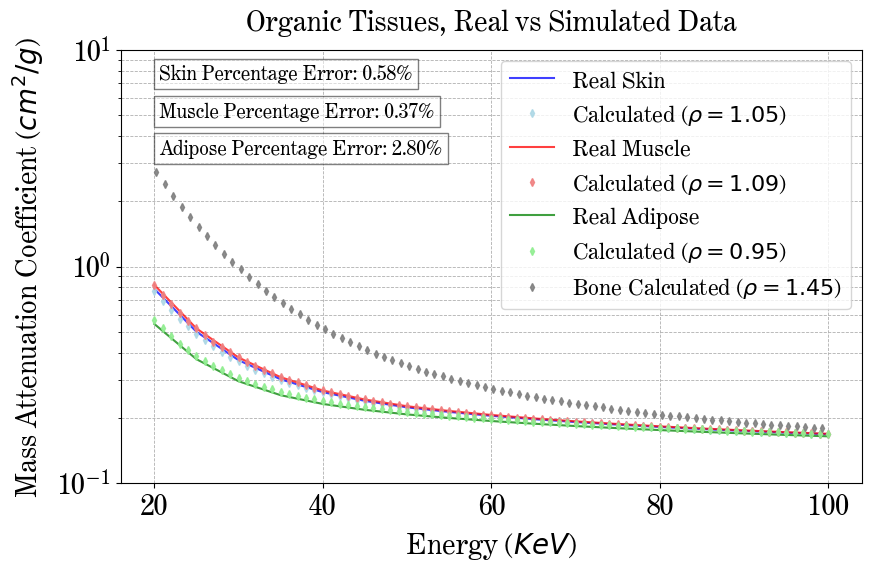

In [10]:
directory = ''

title   = r"Organic Tissues, Real vs Simulated Data" 
x_label = r"Energy ($KeV$)"
y_label = r"Mass Attenuation Coefficient ($cm^2/g$)"

save_as = 'a'

Plot1_Coeff(directory, title, x_label, y_label, save_as)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import Bisection_Library as BisLib

def Plot1_Coeff(directory, title, x_label, y_label, save_as):

    csv_1 = 'CadTel_map.csv'
    x_branch_1 = "Energy"
    y_branch_1 = 'AtCoefficient'

    csv_2 = 'CdTe_nist.csv'
    x_branch_2 = "Energy"
    y_branch_2 = 'AtCoeff'

    df_1 = pd.read_csv(directory + csv_1)
    df_2 = pd.read_csv(directory + csv_2)

    x1 = df_1[x_branch_1]
    y1 = df_1[y_branch_1] 
    df_1.columns = df_1.columns.str.strip()

    x2 = df_2[x_branch_2]
    y2 = df_2[y_branch_2]
    df_2.columns = df_2.columns.str.strip()

    merged_df = pd.merge(df_1, df_2, on = 'Energy', suffixes = ('coeff_calc', 'coeff_real'))
    merged_df['Percentage_Error'] = abs((merged_df[y_branch_1] - merged_df[y_branch_2]) / merged_df[y_branch_2]) * 100
    global_percentage_error = merged_df['Percentage_Error'].mean()
    # print(f"Global Percentage Error: {global_percentage_error:.2f}%")

    merged_df = pd.merge(df_1, df_2, on='Energy', suffixes=('coeff_calc', 'coeff_real'))

    threshold_value = 1 #kev

    filtered_df = merged_df[merged_df['Energy'] > threshold_value].copy()
    filtered_df.loc[:, 'Percentage_Error'] = abs((filtered_df[y_branch_1] - filtered_df[y_branch_2]) / filtered_df[y_branch_2]) * 100
    percentage_error_filtered = filtered_df['Percentage_Error'].mean()
    # print(f"Percentage Error > {threshold_value} keV: {percentage_error_filtered:.2f}%")

    plt.figure(figsize = (10, 6))
    BisLib.PlotsFormatting()
    plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.7)

    plt.plot(x1, y1, marker = 'o', markersize = 2, label = 'Calculated', color = 'blue')
    plt.plot(x2, y2, marker = 'x', markersize = 2, label = 'Real Data', color = 'red', alpha = 0.6)

    plt.xscale('log')
    plt.yscale('log')

    # plt.xlim(.01, 1)
    # plt.ylim(1000, 250000)

    plt.xlabel(x_label, labelpad = 7)
    plt.ylabel(y_label, labelpad = 8)
    plt.title(title, pad = 14)
    plt.legend()

    plt.figtext(0.14, 0.2, f'Global Percentage Error: {global_percentage_error:.2f}%', 
                fontsize = 12, bbox = dict(facecolor = 'white', alpha = 0.5))
    
    plt.figtext(0.14, 0.139, f'Percentage Error > {threshold_value} keV: {percentage_error_filtered:.2f}%', 
                fontsize = 12, bbox = dict(facecolor = 'white', alpha = 0.5))
    

    if save_as == '': plt.savefig(title + save_as + '.png', dpi = 400)
    plt.show()